# <center>Formulación de un problema de optimización (Grupo 06)</center>
# <center>"Trayectoria del disparo de un cañón con objetivo"</center>


# 0. Introducción

Como parte de la última práctica de la asignatura Optimización Heurística, se ha elaborado el presente Notebook como memoria de la realización del proyecto de la formulación de un problema de optimización. 

Para este segundo apartado se propone al grupo la formulación de un problema de la manera correcta para que pueda ser resuelto mediante el uso de algoritmos evolutivos. Para ello es necesario cumplir los siguientes requisitos principales:

- La función de fitness será programada desde cero.
- Se deberá debatir los aspectos relacionados con el problema escogido (número de variables, alelos, operadores específicos...)


De esta manera, hemos decidido dividir la presente memoria en los siguientes apartados:

1. <b>Planteamiento del problema:</b> presentación del problema, descripción del mismo, variables a tener en cuenta, objetivo del problema.
2. <b>Codificación de las variables:</b> forma en la que se han cofidicado las variables.
3. <b>Función de fitness:</b> explicación de la función empleada.
4. <b>Funcionamiento del problema:</b> implementación del algoritmo con el problema y ejemplo de resolución del problema.
5. <b>Solución del problema y conclusión:</b> solución del problema, resultados obtenidos y comentarios finales.

# 1. Planteamiento del problema


Se requiere diseñar un cañón capaz de disparar un proyectil para que se acerque lo máximo posible a un objetivo que se encuentre en el plano horizontal (en el suelo). Para ello el cañón dispone de las siguientes 3 variables:

<!--<center><img src="img/canon.png" width="500px" height="350px"/></center>-->

1. Cantidad de pólvora (con un máximo de 100grs).
2. Ángulo de elevación del cañón.
3. Ángulo de rotación del cañón.

Éstas deberán ser ajustadas por el algoritmo de manera correcta de cara a conseguir hacer caer el proyectil lo más cerca posible de la posición del objetivo.

# 2. Codificación de las variables

Como hemos visto anteriormente, el problema dispone de 3 variables:

1. **Pólvora:** para realizar el disparo se dispone de un máximo de 100grs de pólvora para generar el impuslo inicial de la bala.
2. **Ángulo de elevación:** se trata del ángulo respecto al plano horizontal. Será por tánto como máximo de 90º.
3. **Ángulo de rotación:** ángulo necesario para apuntar hacia el objetivo, siendo el máximo de 360º.

Todas las variables han sido homogeneizadas entre el intervalo \[0, 1] para asegurar los bounds de todas ellas.

In [1]:
polvora   = (0,1)
elevacion = (0,1)
rotacion  = (0,1)

mybounds  = [polvora, elevacion, rotacion]

Además es necesario utilizar una variable que representará el punto P(x,z) del plano donde se encuentra nuestro objetivo:

In [2]:
p_obj = (32, 19) # Coordenadas sobre el plano x,z del objetivo

# 3. Función de fitness

El problema por tanto debe tratar de minimizar la distancia entre la posición en el plano donde ha caído el proyectil y el objetivo.

De esta manera se tiene la siguiente función de fitness:

In [3]:
import math
import numpy as np

# Arrays auxiliares que almacenarán los puntos P(x,z) donde cae la bala
X = []
Z = []

# Función auxiliar que calcula la distancia entre dos puntos en el plano
def dist(p1, p2):
    return math.sqrt(math.pow(p1[0] - p2[0],2) + math.pow(p1[1] - p2[1], 2))

def fitness(variables):

    g = 9.8         # Gravedad para la simulacion
    m = 1000        # Masa de la bala del cañon
    Ec_kg = 3000000 # Energía cinética por cada Kg de polvora

    
    gr_powder =  variables[0] * 100 # Gramos de pólvora que disponemos
    angle_elev = variables[1] * 90  # Ángulo de elevación del cañón
    angle_rot =  variables[2] * 360 # Ángulo de rotación

    # Calculamos la energia cinética que se generaría con determinada cantidad de pólvora
    Ec = (Ec_kg * gr_powder) / 1000
    sqr_V0 = (2 * Ec) / m

    # Calculamos la distancia máxima que recorrería la bala
    recorrido = (sqr_V0 * math.sin(math.radians(2 * angle_elev))) / g

    # Calculamos la distancia entre el punto donde ha caido la bala y nuestro objetivo
    x = math.sin(math.radians(angle_rot)) * recorrido
    z = math.cos(math.radians(angle_rot)) * recorrido
    p_bala = (x, z)
    
    # Añadimos dichos puntos a los arrays para más adelante plotearlos
    X.append(x)
    Z.append(z)

    return dist(p_obj, p_bala)

# 4. Funcionamiento del problema

Una vez se han definido las variables y la función de fitness, el Algoritmo Evolutivo tratará de minimizar la distancia entre la posición donde cae el proyectil y el objetivo. Para ello hemos decidido emplear nuestro propio algoritmo, el cual es llamado con nuestra función de fitness, las variables codificadas y una población de 20. El algoritmo hará 300 iteraciones:

In [4]:
import group06.EA as ea

myea = ea.EA(fitness, mybounds, 20)
myea.run(300)

# 5. Solución del problema y conclusión

Para visualizar mejor cómo se ha comportado nuestro algoritmo, hemos decidido imprimir sobre el plano x,z aquellas posiciones que nuestro algoritmo ha ido generando. A continuación se muestra el plano x,z con las posiciones generadas por el algoritmo de color azul, el cañón en la posición (0,0) de negro y la posición objetivo seleccionada en el problema de color rojo:

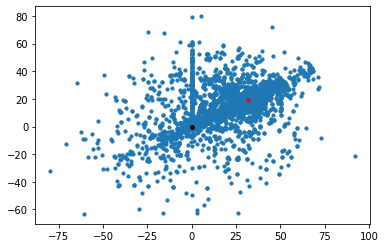

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X,Z, marker='o', s = 10)
plt.scatter(p_obj[0], p_obj[1], color = 'red', s = 10)
plt.scatter(0,0, color = 'black', s = 15)
plt.show()

Seguidamente vamos a comprobar cual es la mejor de las posibilidades. Para ello llamamos al método best() de nuestro algoritmo, que nos devuelve por una parte la codificación de las variables y por la otra el fitness:

In [6]:
solucion = myea.best()

Finalmente podemos "descodificar" nuestras variables para conocer el valor real de las tres variables, junto a la distancia entre la posición final de la bala y el objetivo:

In [7]:
polvora     = solucion.solution[0] * 100
angulo_elev = solucion.solution[1] * 90
angulo_rot  = solucion.solution[2] * 360

print("  Pólvora: " + str(round(polvora, 2)) + " g")
print("Elevación: " + str(round(angulo_elev, 2)) + " º")
print(" Rotación: " + str(round(angulo_rot, 2)) + " º")
print("\n Distancia: " + str(round(solucion.fitnes, 6)) + " m")

  Pólvora: 60.79 g
Elevación: 45.28 º
 Rotación: 59.3 º

 Distancia: 0.002823 m


Como conclusión acerca del problema planteado, tal y como puede observarse en la solución proporcionada, no se trata de la mejor combinación posible entre las tres variables si se tiene en cuenta por ejemplo el tratar de ahorrar pólvora. Si aplicásemos esa restricción, el ángulo de elevación siempre sería de 45º puesto que es el ángulo con el que se consigue mayor distancia.